<a href="https://colab.research.google.com/github/kxrrym03/Formula1-Analysis-/blob/main/Geospatial_analysis_of_global_F1_tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving circuits.csv to circuits.csv


In [5]:
df = pd.read_csv('circuits.csv')
df.shape


(77, 9)

In [6]:
df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [7]:
df.tail()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,12,http://en.wikipedia.org/wiki/Losail_Internatio...
76,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,0,http://en.wikipedia.org/wiki/Miami_Internation...


In [8]:
df.isnull().sum()

,0
circuitId,0
circuitRef,0
name,0
location,0
country,0
lat,0
lng,0
alt,0
url,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [11]:
df.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683,247.012987
std,23.001701,22.808866,65.516951,362.738469
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,18.000000
50%,40.000000,40.951700,3.930830,129.000000
75%,59.000000,46.958900,19.248600,332.000000
max,80.000000,57.265300,144.968000,2227.000000


In [12]:
df.dtypes

,0
circuitId,int64
circuitRef,object
name,object
location,object
country,object
lat,float64
lng,float64
alt,int64
url,object


In [13]:
top_10_countries = df['country'].value_counts().nlargest(10)
print("Top 10 Countries by Number of Circuits:")
print(top_10_countries)

Top 10 Countries by Number of Circuits:
country
USA         11
France       7
Spain        6
Italy        4
Portugal     4
UK           4
Germany      3
Belgium      3
Canada       3
Japan        3
Name: count, dtype: int64


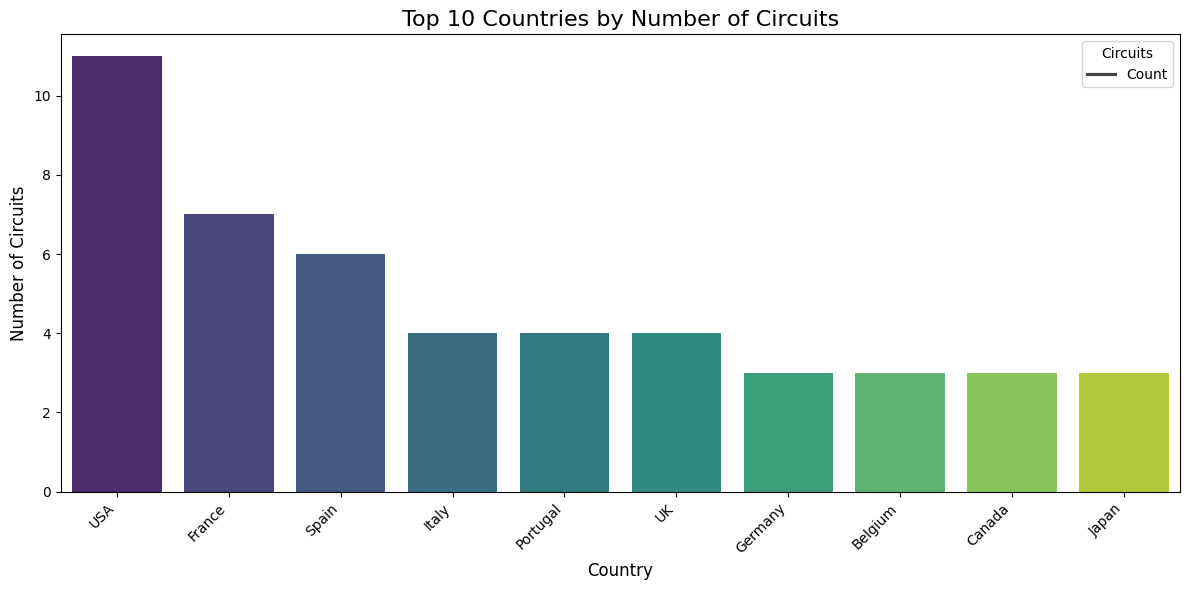

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Circuits', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Circuits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Circuits', labels=['Count'])
plt.tight_layout()
plt.show()

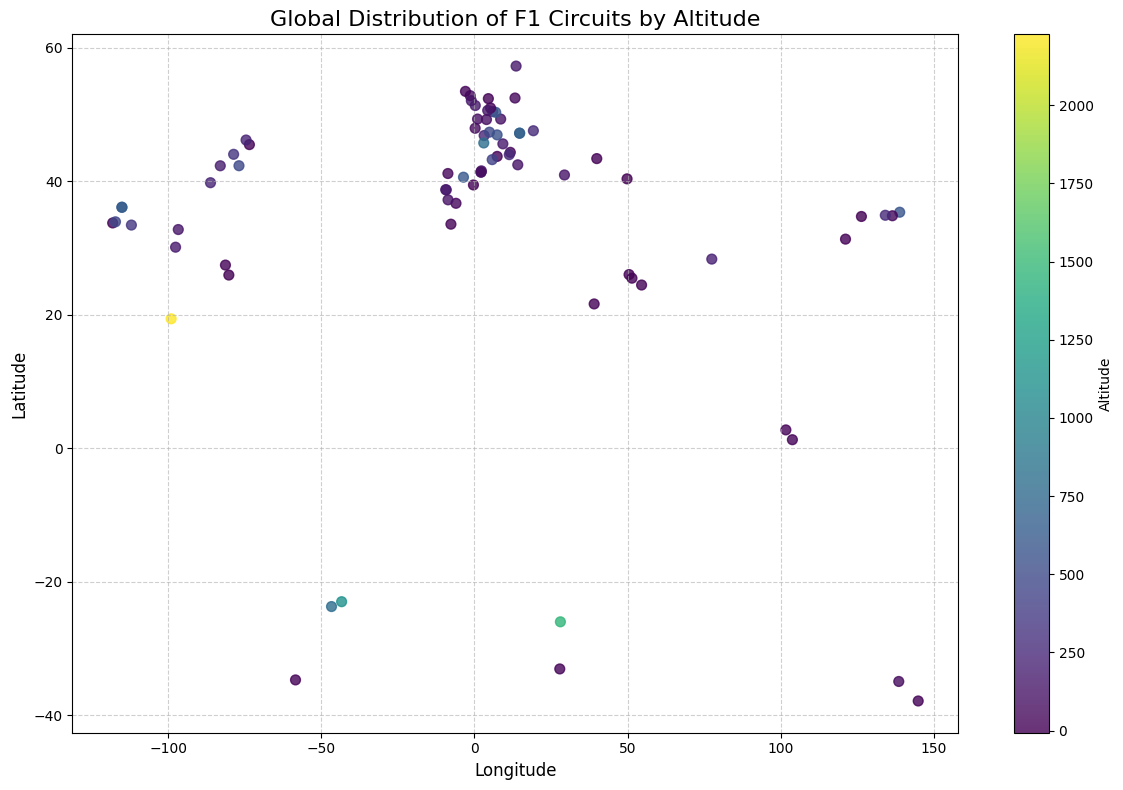

In [15]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=df['lng'], y=df['lat'], c=df['alt'], cmap='viridis', s=50, alpha=0.8)
plt.title('Global Distribution of F1 Circuits by Altitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.colorbar(scatter, label='Altitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
average_altitude_per_country = df.groupby('country')['alt'].mean().sort_values(ascending=False)
print("Average Altitude per Country:")
print(average_altitude_per_country.head())

Average Altitude per Country:
country
Mexico           2227.0
Brazil            955.5
South Africa      737.5
Austria           677.0
United States     642.0
Name: alt, dtype: float64


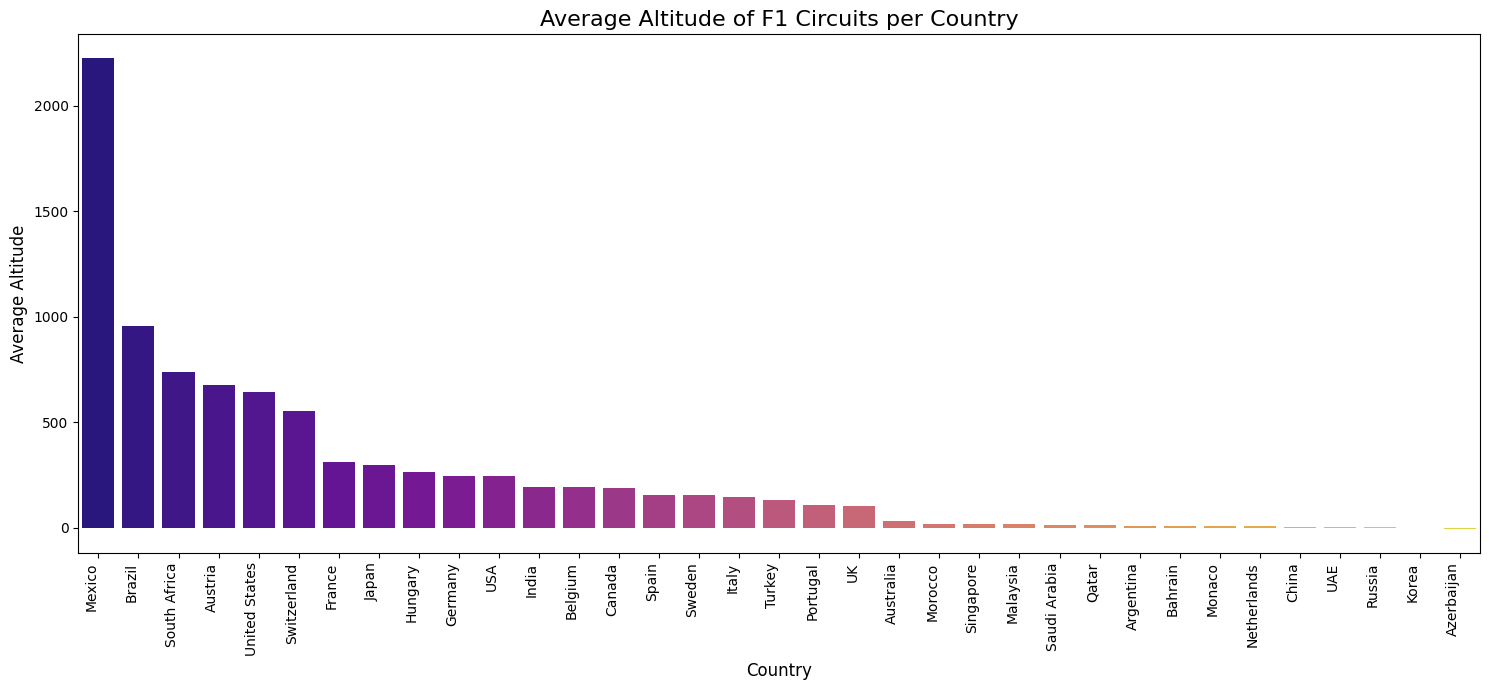

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot(x=average_altitude_per_country.index, y=average_altitude_per_country.values, palette='plasma')
plt.title('Average Altitude of F1 Circuits per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Altitude', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

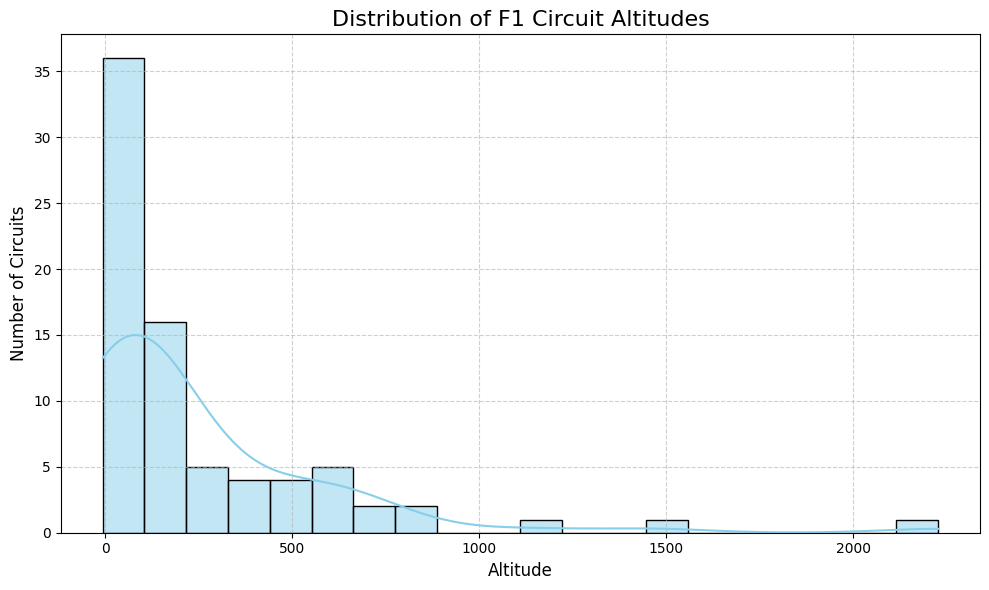

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['alt'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of F1 Circuit Altitudes', fontsize=16)
plt.xlabel('Altitude', fontsize=12)
plt.ylabel('Number of Circuits', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


```python
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop unnecessary identifier columns
df_processed = df.drop(columns=['circuitId', 'circuitRef', 'name', 'url'])

# Identify categorical and numerical columns
categorical_features = ['location', 'country']
numerical_features = ['lat', 'lng', 'alt']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X = preprocessor.fit_transform(df_processed)

try:
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = list(feature_names) + numerical_features
except AttributeError:
    
    print("Warning: get_feature_names_out not available. Using generic names for one-hot encoded features.")
    num_cat_features = preprocessor.named_transformers_['cat'].fit(df_processed[categorical_features]).categories_
    encoded_feature_names = [f"{col}_{cat}" for i, col in enumerate(categorical_features) for cat in num_cat_features[i]]
    all_feature_names = encoded_feature_names + numerical_features

# Convert the preprocessed data to a DataFrame for better readability
X_df = pd.DataFrame(X, columns=all_feature_names)

print("Shape of the preprocessed feature matrix X:", X_df.shape)
print("\nFirst 5 rows of the preprocessed features:")
print(X_df.head())

```


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
print("OneHotEncoder and ColumnTransformer imported successfully.")

OneHotEncoder and ColumnTransformer imported successfully.


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Drop unnecessary identifier columns
df_processed = df.drop(columns=['circuitId', 'circuitRef', 'name', 'url'])

# Identify categorical and numerical columns
categorical_features = ['location', 'country']
numerical_features = ['lat', 'lng', 'alt']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Apply preprocessing
X = preprocessor.fit_transform(df_processed)

all_feature_names = preprocessor.get_feature_names_out()

# Convert the preprocessed data to a DataFrame for better readability
X_df = pd.DataFrame(X, columns=all_feature_names)

print("Shape of the preprocessed feature matrix X_df:", X_df.shape)
print("\nFirst 5 rows of the preprocessed features:")
print(X_df.head())

Shape of the preprocessed feature matrix X_df: (77, 113)

First 5 rows of the preprocessed features:
   location_Abu Dhabi  location_Adelaide  location_Al Daayen  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3                 0.0                0.0                 0.0   
4                 0.0                0.0                 0.0   

   location_Anderstorp  location_Austin  location_Baku  location_Barcelona  \
0                  0.0              0.0            0.0                 0.0   
1                  0.0              0.0            0.0                 0.0   
2                  0.0              0.0            0.0                 0.0   
3                  0.0              0.0            0.0                 0.0   
4                  0.0              0.0            0.0                 0.0   

   location_Berlin  location_Bern  location_B

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Drop unnecessary identifier columns
df_processed = df.drop(columns=['circuitId', 'circuitRef', 'name', 'url'])

# Identify categorical and numerical columns
categorical_features = ['location', 'country']
numerical_features = ['lat', 'lng', 'alt']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Apply preprocessing
X = preprocessor.fit_transform(df_processed)

all_feature_names = preprocessor.get_feature_names_out()

# Convert the preprocessed data to a DataFrame for better readability
X_df = pd.DataFrame(X, columns=all_feature_names)

print("Shape of the preprocessed feature matrix X_df:", X_df.shape)
print("\nFirst 5 rows of the preprocessed features:")
print(X_df.head())

Shape of the preprocessed feature matrix X_df: (77, 113)

First 5 rows of the preprocessed features:
   location_Abu Dhabi  location_Adelaide  location_Al Daayen  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3                 0.0                0.0                 0.0   
4                 0.0                0.0                 0.0   

   location_Anderstorp  location_Austin  location_Baku  location_Barcelona  \
0                  0.0              0.0            0.0                 0.0   
1                  0.0              0.0            0.0                 0.0   
2                  0.0              0.0            0.0                 0.0   
3                  0.0              0.0            0.0                 0.0   
4                  0.0              0.0            0.0                 0.0   

   location_Berlin  location_Bern  location_B

In [33]:
y = df['country']
print("Shape of the target variable y:", y.shape)
print("\nFirst 5 values of the target variable y:")
print(y.head())

Shape of the target variable y: (77,)

First 5 values of the target variable y:
0    Australia
1     Malaysia
2      Bahrain
3        Spain
4       Turkey
Name: country, dtype: object


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Instantiate a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
print("RandomForestClassifier model trained successfully.")

X_train shape: (61, 113)
X_test shape: (16, 113)
y_train shape: (61,)
y_test shape: (16,)
RandomForestClassifier model trained successfully.


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision, recall, and F1-score using 'weighted' average for multi-class
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

# Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6875
Precision (weighted): 0.6875
Recall (weighted): 0.6875
F1-Score (weighted): 0.6875

Classification Report:
              precision    recall  f1-score   support

   Australia       0.00      0.00      0.00         2
     Austria       0.00      0.00      0.00         0
     Belgium       1.00      1.00      1.00         1
      Brazil       1.00      1.00      1.00         1
      Canada       1.00      1.00      1.00         1
      France       1.00      1.00      1.00         3
     Hungary       0.00      0.00      0.00         1
       Italy       0.00      0.00      0.00         0
       Japan       0.00      0.00      0.00         0
    Portugal       1.00      1.00      1.00         1
       Qatar       0.00      0.00      0.00         0
Saudi Arabia       0.00      0.00      0.00         1
       Spain       1.00      1.00      1.00         1
      Turkey       0.00      0.00      0.00         1
         USA       1.00      1.00      1.00         3

    accura